# 1.Importing Packages and Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2.Loading Database 

In [33]:
df=pd.read_csv('computer_sales.csv')
print(df.head(36))

    InvoiceID        Date  CustomerID CustomerRegion ProductCategory   Brand  \
0           1  2023-01-01         272           East         Desktop  Lenovo   
1           2  2023-01-02         147           East         Desktop   Apple   
2           3  2023-01-03         217          South         Desktop      HP   
3           4  2023-01-04         292          South         Desktop      HP   
4           5  2023-01-05         423           West         Desktop    Acer   
5           6  2023-01-06         351           East          Laptop      HP   
6           7  2023-01-07         295           West         Desktop   Apple   
7           8  2023-01-08         459          South         Desktop      HP   
8           9  2023-01-09         109           East       Accessory   Apple   
9          10  2023-01-10         311           East          Laptop    Acer   
10         11  2023-01-11         377          South          Laptop   Apple   
11         12  2023-01-12         342   

In [37]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   InvoiceID        1000 non-null   int64 
 1   Date             1000 non-null   object
 2   CustomerID       1000 non-null   int64 
 3   CustomerRegion   1000 non-null   object
 4   ProductCategory  1000 non-null   object
 5   Brand            1000 non-null   object
 6   UnitPrice        1000 non-null   int64 
 7   Quantity         1000 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 62.6+ KB
None


# 3.Overview the database

In [39]:
print(df.describe())

         InvoiceID   CustomerID    UnitPrice    Quantity
count  1000.000000  1000.000000  1000.000000  1000.00000
mean    500.500000   302.946000  1179.545000     2.51000
std     288.819436   115.281043   488.946241     1.12123
min       1.000000   100.000000   301.000000     1.00000
25%     250.750000   205.000000   748.000000     2.00000
50%     500.500000   298.500000  1203.000000     3.00000
75%     750.250000   405.250000  1613.000000     4.00000
max    1000.000000   498.000000  1998.000000     4.00000


In [41]:
print(df.isnull().sum())

InvoiceID          0
Date               0
CustomerID         0
CustomerRegion     0
ProductCategory    0
Brand              0
UnitPrice          0
Quantity           0
dtype: int64


# 4.Sales Analysis

In [68]:
df['Sales']=df['UnitPrice']*df['Quantity']
print(df.head(11))


    InvoiceID        Date  CustomerID CustomerRegion ProductCategory   Brand  \
0           1  2023-01-01         272           East         Desktop  Lenovo   
1           2  2023-01-02         147           East         Desktop   Apple   
2           3  2023-01-03         217          South         Desktop      HP   
3           4  2023-01-04         292          South         Desktop      HP   
4           5  2023-01-05         423           West         Desktop    Acer   
5           6  2023-01-06         351           East          Laptop      HP   
6           7  2023-01-07         295           West         Desktop   Apple   
7           8  2023-01-08         459          South         Desktop      HP   
8           9  2023-01-09         109           East       Accessory   Apple   
9          10  2023-01-10         311           East          Laptop    Acer   
10         11  2023-01-11         377          South          Laptop   Apple   

    UnitPrice  Quantity  Sales  
0     

## Product Wise Sale

                   Sales
ProductCategory         
Accessory         955066
Desktop          1028865
Laptop            971531


<Axes: xlabel='ProductCategory'>

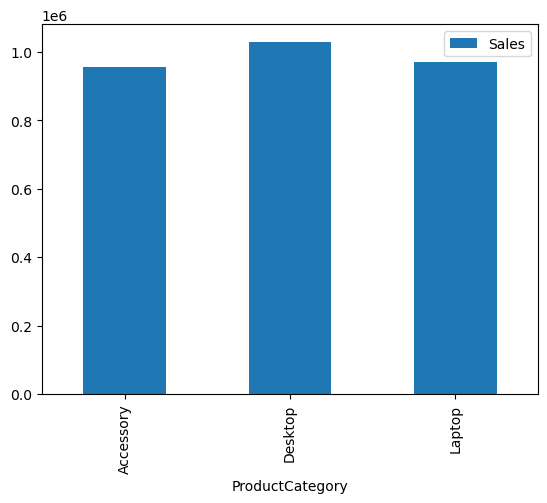

In [66]:
pivot1=pd.pivot_table(
    df,
    index='ProductCategory',
    values='Sales',
    aggfunc='sum'
)
print(pivot1)
pivot1.plot(kind='bar')

ProductCategory
Desktop      1028865
Laptop        971531
Accessory     955066
Name: Sales, dtype: int64


<Axes: ylabel='Sales'>

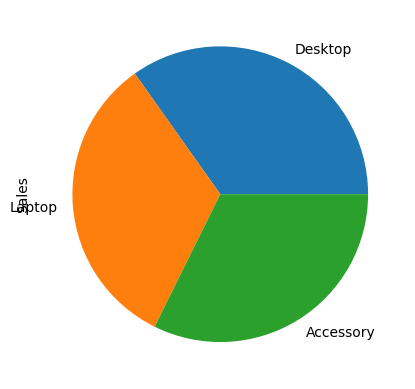

In [80]:
category_sales=df.groupby('ProductCategory')['Sales'].sum().sort_values(ascending=False)
print(category_sales)

category_sales.plot(kind='pie')

Brand
Acer      534110
Dell      585753
Lenovo    586889
Apple     609642
HP        639068
Name: Sales, dtype: int64


<Axes: ylabel='Sales'>

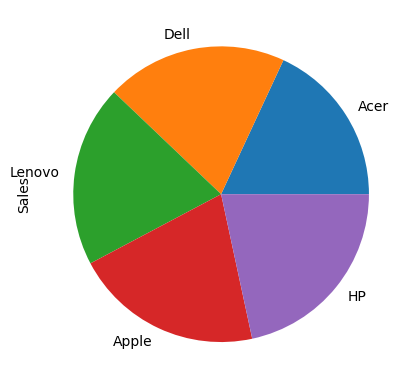

In [94]:
category_sales=df.groupby('Brand')['Sales'].sum().sort_values()
print(category_sales)

category_sales.plot(kind='pie')

In [96]:
print(df.head(5))

   InvoiceID        Date  CustomerID CustomerRegion ProductCategory   Brand  \
0          1  2023-01-01         272           East         Desktop  Lenovo   
1          2  2023-01-02         147           East         Desktop   Apple   
2          3  2023-01-03         217          South         Desktop      HP   
3          4  2023-01-04         292          South         Desktop      HP   
4          5  2023-01-05         423           West         Desktop    Acer   

   UnitPrice  Quantity  Sales  
0       1965         1   1965  
1        815         4   3260  
2        823         4   3292  
3       1711         4   6844  
4       1434         4   5736  


           UnitPrice  Quantity     Sales
UnitPrice   1.000000 -0.009487  0.641566
Quantity   -0.009487  1.000000  0.699714
Sales       0.641566  0.699714  1.000000


<Axes: >

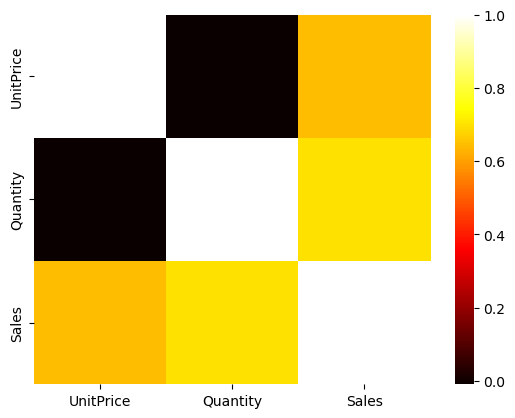

In [104]:
corr_mat=df[['UnitPrice','Quantity','Sales']].corr()
print(corr_mat)
sns.heatmap(corr_mat,cmap='hot')

In [112]:
customer_summery=df.groupby('CustomerID')['Sales'].sum().sort_values(ascending=False)
print(customer_summery)

CustomerID
496    24354
297    24016
248    24008
307    24000
390    23263
       ...  
152      646
412      646
196      576
201      394
121      326
Name: Sales, Length: 371, dtype: int64
